<a href="https://colab.research.google.com/github/murali-marimekala/tensorflow_deeplearning_bootcamp/blob/main/4_Neural_Network_Classification_with_Tensorflow/1_Neural_Network_Classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


### Types of classification
1. Classification
2. Multi-classification problems (100 different classes / foods, cars , animals etc) : **One label per sample**
3. Multi-label classification:  **Multiple labels per sample**

## Classification
What will be covered ?
1. Architecture of a neural network classification model.
2. Input shapes and output shapes of a classification model (features and labels)
3. Creating custom data to view and fit
4. Steps in modelling
5. Creating a model, compiling a model, fitting a model, evaluating a model
6. Different classification evalation methods
7. Saving and loading models

# Classification inputs and outputs

Inputs -> Machine learning Algorithm -> Output

Multiclass classification of predicting an image involves

Input Images -> Numerical encoding of pixel values (Height , Width , C (RGB)) -> Turn this data into Tensor -> ML Alogirthm -> Predictd Output -> Actual output

Usually the Tensor looks like  [Batchsize, height, width, colour_channels]

Introduction to NN classificaiton with tensorflow.

We are going to explore
1. How to write NN for classificaito problem where we classify as something or another.
* Binary Classificaiton
* Multiclass Classification
* Multilabel Classification

## Creating Data to view and fit

In [2]:
from sklearn.datasets import make_circles
#Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
#Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
#Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Which classificaiton is it ? Our data is hard to understand. Lets visualize

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [6]:
circles.label.value_counts()

,count
label,
1,500
0,500


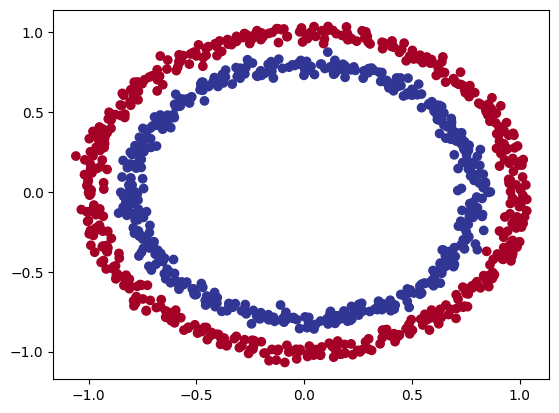

In [7]:
#Visualize with plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1],c=y, cmap=plt.cm.RdYlBu)

Tensorflow playground is interesting.
https://playground.tensorflow.org

In [8]:
#Check shape of features and lables
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
#Now length of featuresand labels
len(X), len(y)


(1000, 1000)

In [10]:
#View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [11]:
#Lets write a NN code with tensorflow
#Set the radom seed
tf.random.set_seed(42)

#1. Create the model with Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"]) # Accuracy states : out of 100 samples how manyour model get it right

#3. Fit the model
model_1.fit(X,y,epochs=100)

#4. evaluate the model
model_1.evaluate(X,y)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4780 - loss: 3.0673
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5115 - loss: 0.6961
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5080 - loss: 0.6945
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4974 - loss: 0.6943
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4848 - loss: 0.6944
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4453 - loss: 0.6945
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4451 - loss: 0.6946
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4187 - loss: 0.6947
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4186 - loss: 0.6948
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4246 - loss: 0.6948
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4251 - loss: 0.6948
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

[0.6932879686355591, 0.4729999899864197]

In [12]:
#Lets improve our model by training it longer. Its 48% accurate till now
model_1.fit(X,y,epochs=100, verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927 


[0.6932879686355591, 0.4729999899864197]

Since we are working on Binary classification problem. Our model is getting 48% accuracy. Its just guessing. Lets add one more layer.

In [13]:
#Set random seeed
tf.random.set_seed(42)

#1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
model_2.fit(X,y,epochs=100, verbose=0)

#4. Evaluate the model
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4765 - loss: 0.6926  


[0.6932761073112488, 0.46700000762939453]

# Improving the model

1. Create a model - Add more layers or increase the number of hidden units within a layer
2. Compile a model - Here we might want to choose a different optimization function such as atom instead of SGD(). Change activation function, optimization function
3. Fitting a model - Perhaps we might fit our model for more epochs (leaving it training for longer). Change learning rate

In [14]:
#Set random seed
tf.random.set_seed(42)

#1. Create a model with 3 layers now
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model with new optimizer Adam instead of SGD
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. Fit the mode
model_3.fit(X,y,epochs=100, verbose=0)


In [15]:
#Evaluate the model
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5080 - loss: 0.6916


[0.6948869228363037, 0.49000000953674316]

Its still 100%. Its better we visualize the predictions and see whats happening and then we can fine tune the model.

In [16]:
#Check modles summary
model_1.summary()
model_2.summary()
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (32.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

In [17]:
#Lets visualize the predictions.
#First lets display predictions
model_3.predict(X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.5201157 ],
       [0.4641646 ],
       [0.46246493],
       [0.48874623],
       [0.48473805],
       [0.48530662],
       [0.50477034],
       [0.51894283],
       [0.46497494],
       [0.50556797],
       [0.4533128 ],
       [0.52661145],
       [0.50163084],
       [0.50729775],
       [0.49706095],
       [0.4785387 ],
       [0.44702953],
       [0.47491443],
       [0.45645034],
       [0.4490158 ],
       [0.5202183 ],
       [0.48613483],
       [0.4659512 ],
       [0.52059984],
       [0.4651816 ],
       [0.45865554],
       [0.5193382 ],
       [0.5144608 ],
       [0.4806481 ],
       [0.50173575],
       [0.4573769 ],
       [0.50127375],
       [0.5051413 ],
       [0.5244375 ],
       [0.46196735],
       [0.47443682],
       [0.47985828],
       [0.51943   ],
       [0.48157   ],
       [0.5285585 ],
       [0.45001924],
       [0.5211363 ],
       [0.4478404 ],
       [0.5128551 ],
       [0.445629  ],
       [0.44781995],
       [0.4900977 ],
       [0.513

To visualize our models predictions, lets create a function 'plot_decision_boundary()' , this function will

* Take in a trainedmodel, feature(X) and labels(y)
* Create a mesh grid of the different X values
* Make predictions across mesh grid
* Plot the predictions as well as a line between zones (where each unique class falls)




In [18]:
import numpy as np

In [19]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [20]:
X[:,0].min()

-1.0595024599098635

In [21]:
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1
  x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1337117525463374)

In [22]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  #Create X values (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]  # Stack 2D arrays together

  #Make predictions
  y_pred =  model.predict(x_in)

  #check if multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classificaiton")
    # we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  #Plat the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


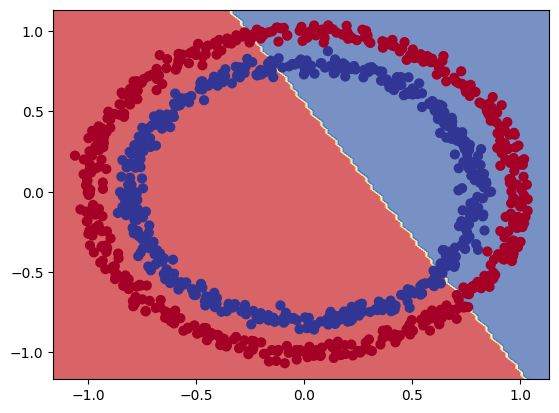

In [23]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

Useful resources
https://cs231n.github.io/neural-networks-case-study/
https://madewithml.com/

In [28]:
#Lets see if our model can be used for regression problem
tf.random.set_seed(42)

#Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) #y = X + 1000

#X_regression, y_regression

#Split our regression data into train and test tests
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_2_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 2), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None,), dtype=int32)
  • training=True
  • mask=None